In [1]:
import os

import contextily as ctx
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
enriched_points = dd.read_csv(
    "./anglova_metrics_enriched/points_enriched_metrics.csv",
).compute()
enriched_points["t"] = pd.to_datetime(enriched_points["t"])
enriched_trajectories_df = pd.read_csv(
    "./anglova_metrics_enriched/trajectories_enriched_metrics.csv",
)
output_path = "./assets/Straight Line Distance/"

In [3]:
cud_okabe_ito_colors = [
    "#E69F00",  # orange
    "#56B4E9",  # sky blue
    "#009E73",  # green
    "#F0E442",  # yellow
    "#0072B2",  # blue
    "#D55E00",  # reddish orange
    "#CC79A7",  # purple
    "#000000",  # black
]

In [4]:
def save_plot(filename):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(
        f"{output_path}/{filename}.png",
        bbox_inches="tight",
    )
    plt.savefig(
        f"{output_path}/{filename}.pdf",
        bbox_inches="tight",
    )

In [6]:
plt.rcParams.update({"font.size": 24})

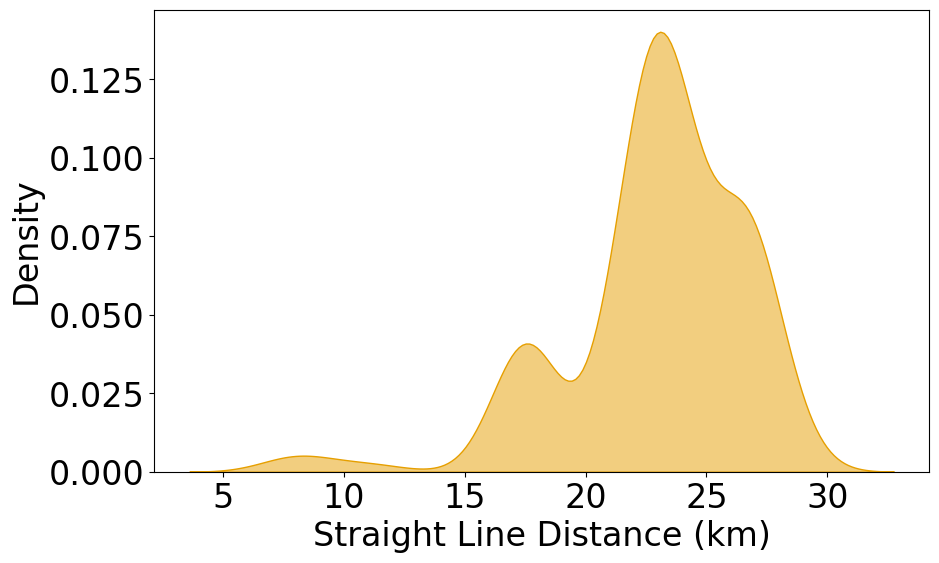

In [12]:
# Remove duplicate rows based on the subset of columns
plt.figure(figsize=(10, 6))
plt.rcParams.update({"font.size": 24})

# Plot KDE for each company with custom legends
sns.kdeplot(
    data=enriched_trajectories_df,
    x="straight_line_distance",
    fill=True,
    common_norm=False,
    alpha=0.5,
)

plt.xlabel("Straight Line Distance (km)")
plt.ylabel("Density")
# plt.legend()#title="Companies")
save_plot("Anglova_kde")
plt.show()

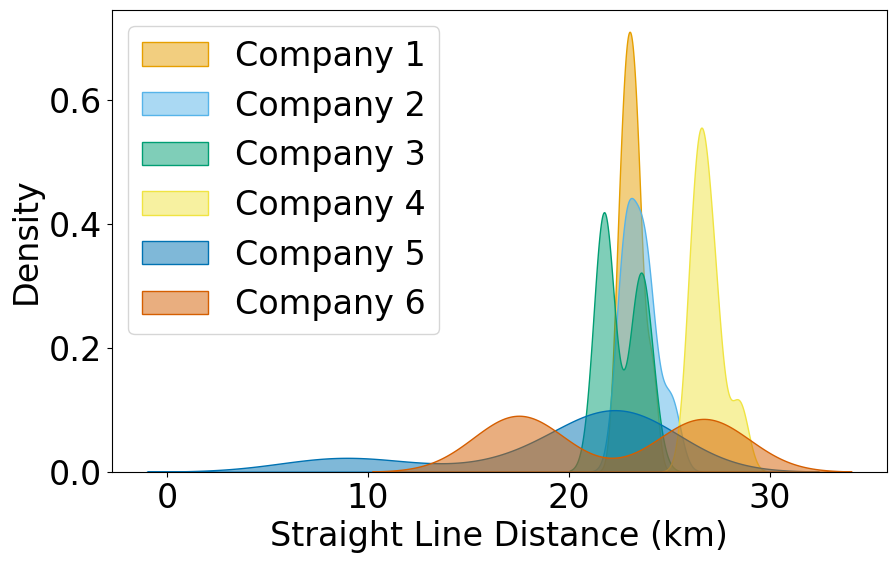

In [25]:
# Remove duplicate rows based on the subset of columns
plt.figure(figsize=(10, 6))
plt.rcParams.update({"font.size": 24})

# Plot KDE for each company with custom legends
for i in enriched_trajectories_df["Company"].unique():
    sns.kdeplot(
        data=enriched_trajectories_df[enriched_trajectories_df["Company"] == i],
        x="straight_line_distance",
        fill=True,
        common_norm=False,
        alpha=0.5,
        label=f"Company {i}",
    )

plt.xlabel("Straight Line Distance (km)")
plt.ylabel("Density")
plt.legend()#title="Companies")
save_plot("Company_kde")
plt.show()

C:\Users\edgar\AppData\Local\Temp\ipykernel_1800\2545831339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


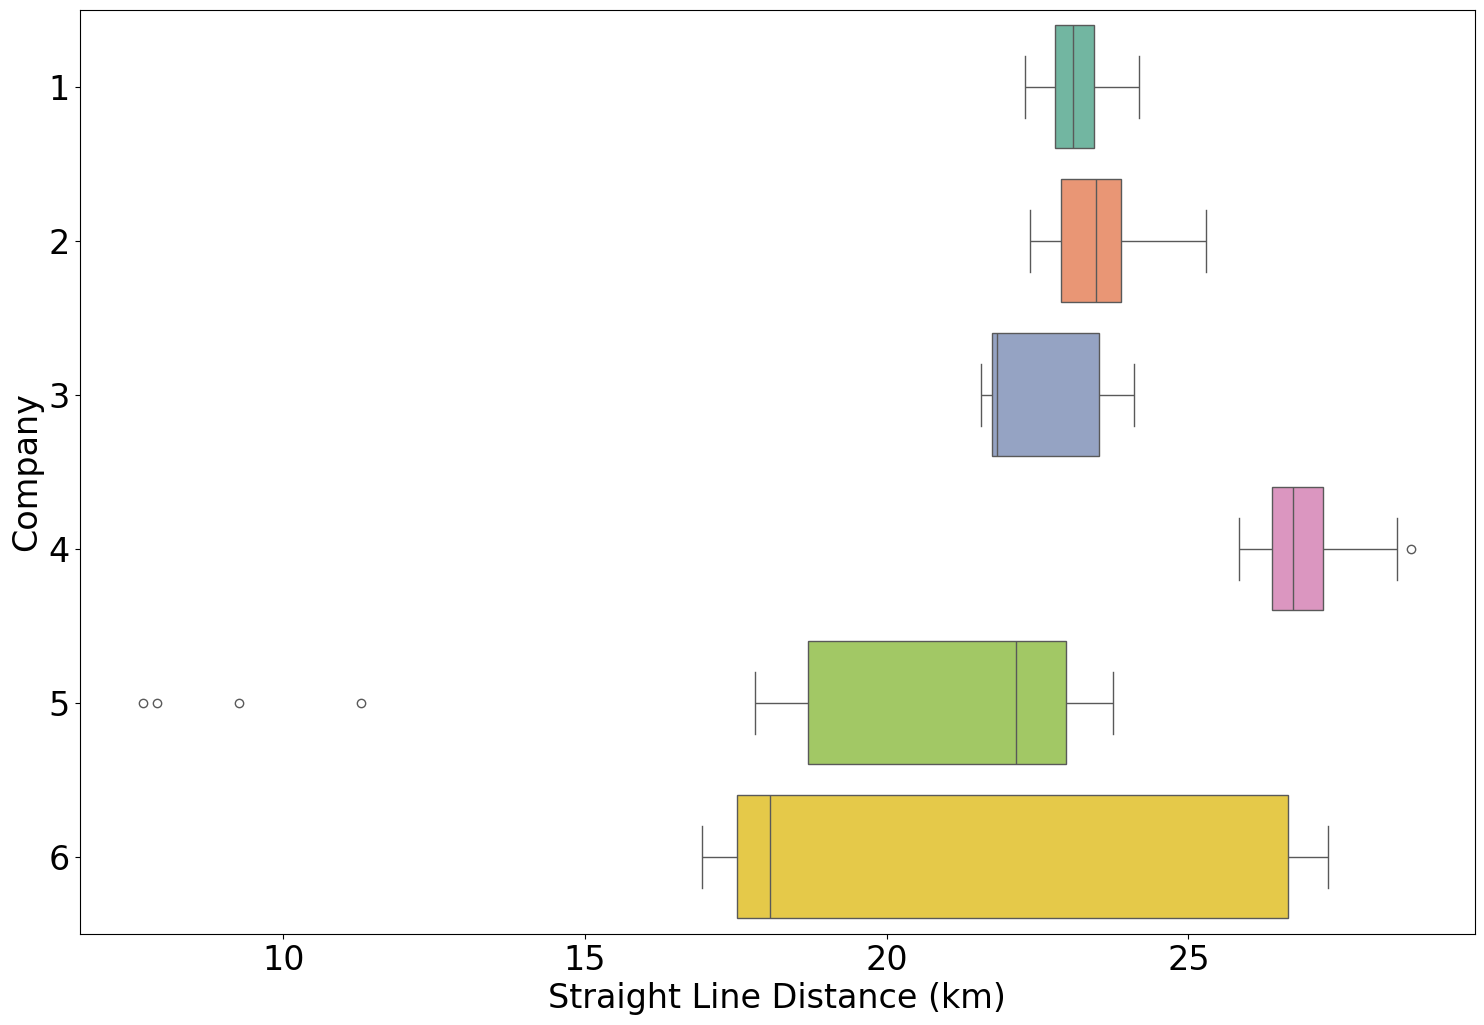

In [ ]:
# Set up the figure
plt.figure()

# Create the boxplot
sns.boxplot(
    data=enriched_trajectories_df,
    x="straight_line_distance",
    y="Company",
    palette="Set2",
    orient="h",
)

# Add labels and title
plt.xlabel("Straight Line Distance (km)")
plt.ylabel("Company")

# Save and show the plot
save_plot("Company_boxplot")
plt.show()

C:\Users\edgar\AppData\Local\Temp\ipykernel_1800\34862918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\edgar\AppData\Local\Temp\ipykernel_1800\34862918.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


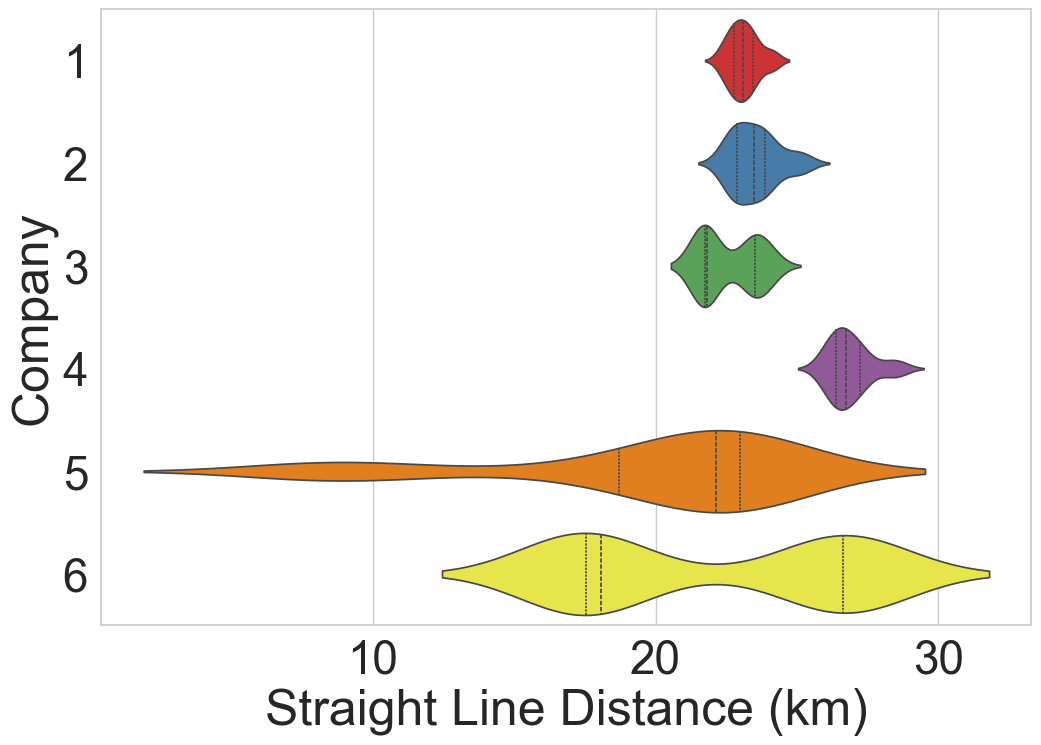

In [60]:
# Set up the figure
plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=3, rc={"font.size": 24})
sns.set_style({"font.weight": "bold"})
# Create the violin plot
sns.violinplot(
    data=enriched_trajectories_df,
    x="straight_line_distance",
    y="Company",
    palette="Set1",
    scale="width",
    inner="quartile",
    orient="h",
)

# Add labels and title
plt.xlabel("Straight Line Distance (km)")
plt.ylabel("Company")

# Save and show the plot
save_plot("Company_violinplot")
plt.show()

c:\Users\edgar\anaconda3\envs\moveminer\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\edgar\anaconda3\envs\moveminer\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\edgar\anaconda3\envs\moveminer\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\edgar\anaconda3\envs\moveminer\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*

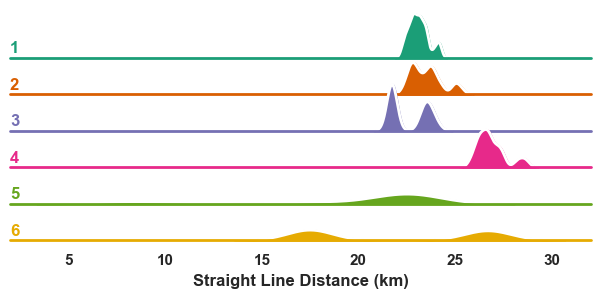

In [48]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Initialize the FacetGrid object
unique_companies = enriched_trajectories_df['Company'].unique()
# pal = sns.cubehelix_palette(len(unique_companies), rot=-.25, light=.7)
pal = sns.color_palette("Dark2", len(unique_companies))
g = sns.FacetGrid(
    enriched_trajectories_df,
    row="Company",
    hue="Company",
    aspect=15,
    height=.5,
    palette=pal,
)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    "straight_line_distance",
    bw_adjust=.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(
    sns.kdeplot,
    "straight_line_distance",
    clip_on=False,
    color="w",
    lw=2,
    bw_adjust=.5,
)

# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

g.map(label, "straight_line_distance")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
g.set_xlabels("Straight Line Distance (km)", fontweight="bold")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
save_plot("Company_facetgrid")


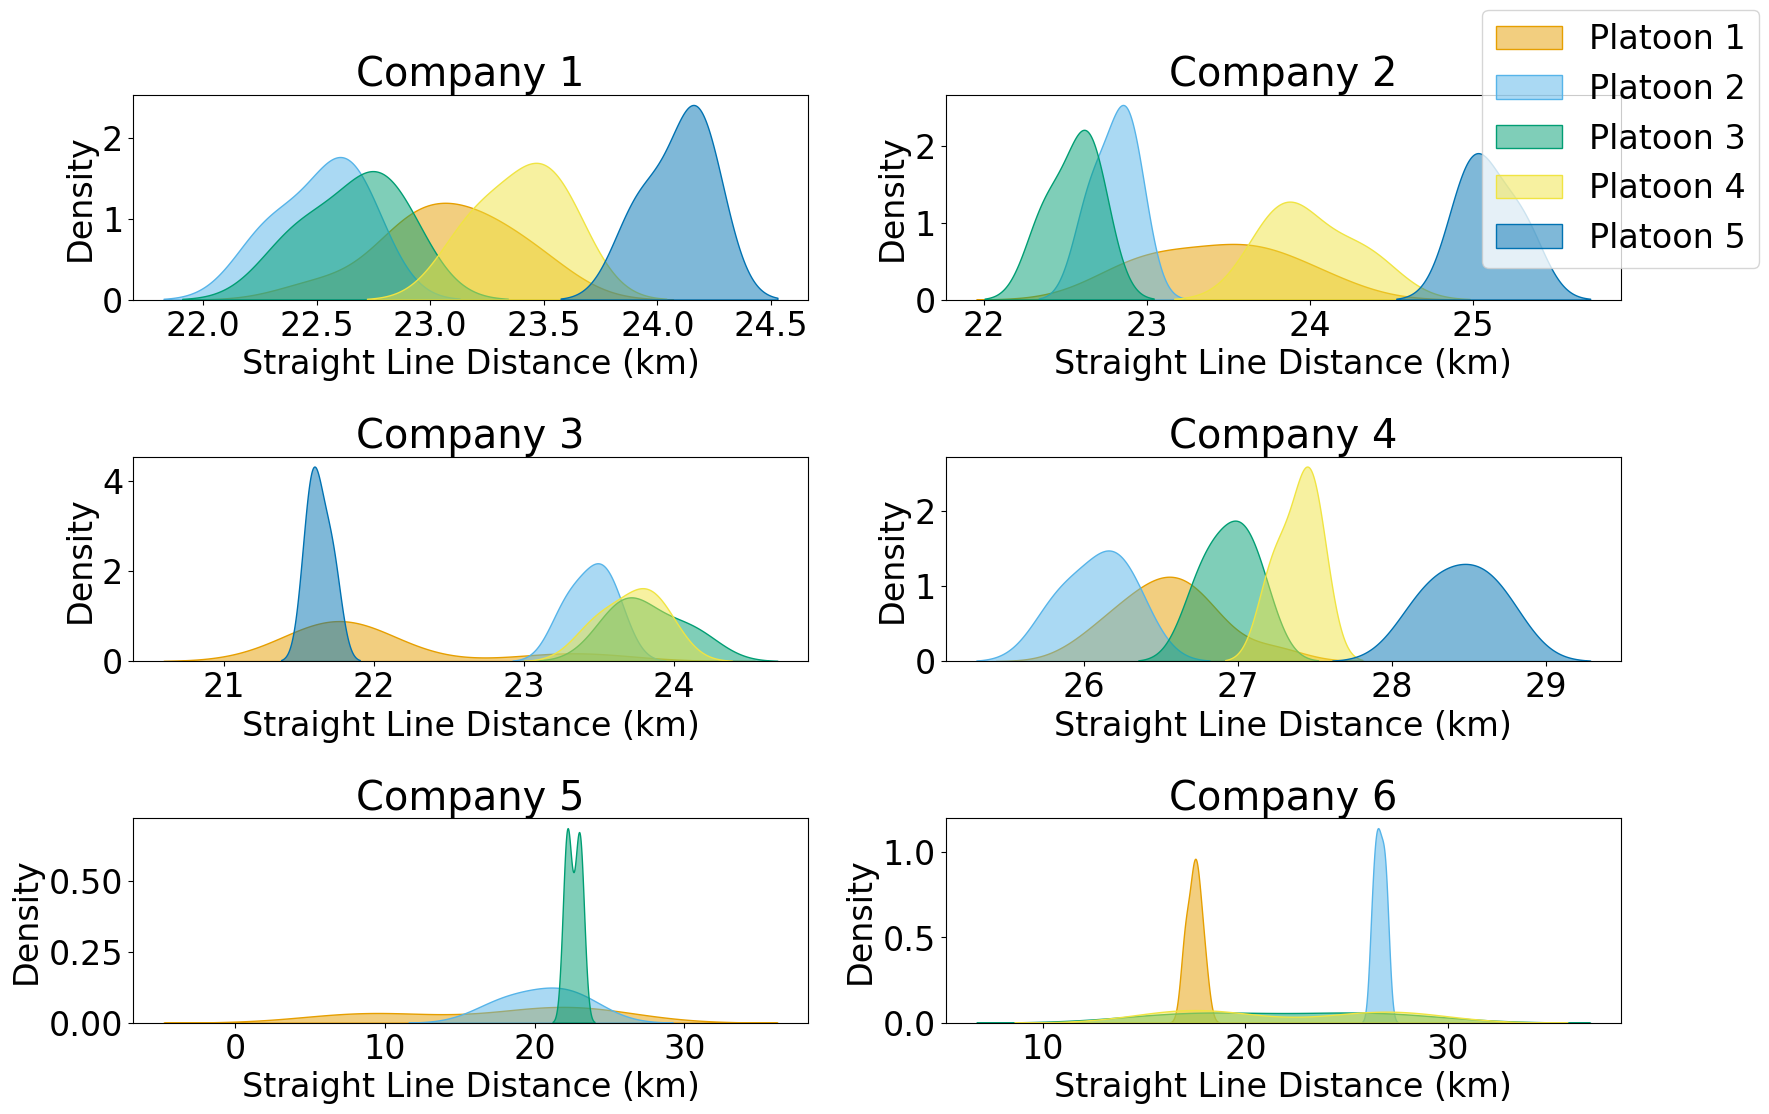

In [13]:
# Define grid dimensions
n, m = 3,2   # 3x2 grid

# Get unique companies
unique_companies = enriched_trajectories_df["Company"].unique()

# Create subplots
fig, axes = plt.subplots(n, m, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot KDE for each company
sns.set_palette(cud_okabe_ito_colors)
for idx, company in enumerate(unique_companies):
    company_data = enriched_trajectories_df[enriched_trajectories_df["Company"] == company]
    for i in company_data["Platoon"].unique():
        sns.kdeplot(
            ax=axes[idx],
            data=company_data[company_data["Platoon"] == i],
            x="straight_line_distance",
            fill=True,
            common_norm=True,
            alpha=0.5,
            label=f"Platoon {i}",
        )
    axes[idx].set_title(f"Company {company}")
    axes[idx].set_xlabel("Straight Line Distance (km)")
    axes[idx].set_ylabel("Density")
    if idx == 1:
        axes[idx].legend(loc='upper center', bbox_to_anchor=(1, 1.5), fontsize=24)

# Hide unused subplots
for ax in axes[len(unique_companies):]:
    ax.axis("off")

plt.tight_layout()
save_plot("Company_vs_Platoon_kde")
plt.show()
